# Thunder context

The `ThunderContext` is the entry point for loading data and interacting with remote services (e.g. Amazon).

Setup plotting
--------------

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
from thunder import Colorize
image = Colorize.image

Construction
------------
A ``ThunderContext`` (you'll only need one) is automatically provided as the variable ``tsc`` when you start the interactive shell using the command line call ``thunder``. It also be created manually, in two different ways, which can be useful when writing standalone analysis scripts (see examples in ``thunder.standalone``). First, it can be created from an existing instance of a ``SparkContext``:

In [3]:
from thunder import ThunderContext
tsc = ThunderContext(sc)

Or it can be created directly using the same arguments provided to a ``SparkContext`` (we don't run this line here because you can't run multiple ``SparkContexts`` at once):

```
tsc = ThunderContext.start(appName='myapp')
```

Loading data
------------
The primary methods for loading data are `loadSeries` and `loadImages`, for loading a `Series` or `Images` object, respectively. Here we show example syntax for loading two example data sets included with ``thunder``, and in each case inspect the first element. (To use these example data sets, we'll first figure out their path on our system.) See the Input Format tutorial for more information on loading and data types.

In [4]:
import os.path as pth
datapath = pth.join(pth.dirname(pth.realpath(thunder.__file__)), 'utils/data/')

In [5]:
data = tsc.loadImages(datapath + '/mouse/images/', startIdx=0, stopIdx=10)

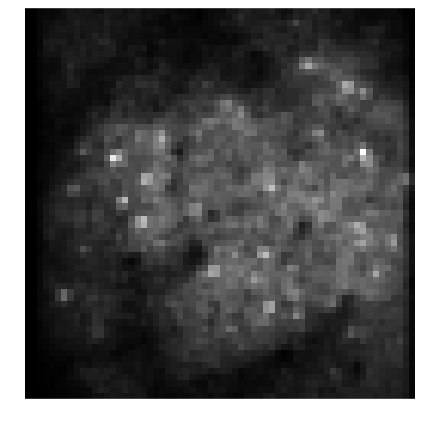

In [6]:
image(data.values().first())

In [7]:
data = tsc.loadSeries(datapath + '/iris/iris.bin', inputFormat='binary')
data.first()

((0,), array([ 5.1,  3.5,  1.4,  0.2]))

Currently, ``loadImages`` can load ``tif``, ``png``, or ``binary`` images (or volumes) from a local file system, networked file system, Amazon S3, or Google Storage. ``loadSeries`` can load data from one or more ``text`` or ``binary`` files on a local file system, networked file system, Amazon S3, or HDFS.

The methods ``loadImagesFromArray`` and ``loadSeriesFromArray`` can be used to used to load data directly from numpy arrays.

In [8]:
from numpy import random
data = tsc.loadSeriesFromArray(random.randn(50,10))

In [9]:
data.nrecords

50

In [10]:
data.index

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
data = tsc.loadImagesFromArray(random.randn(50,10,10))

In [12]:
data.nrecords

50

In [13]:
data.dims.count

(10, 10)

Finally, ``loadSeries`` can also load data stored in local arrays in either numpy ``npy`` or Matlab ``MAT`` format (if loading from a ``MAT`` file, you must additionally provide a variable name). This is especially useful for smaller local datasets, or for distributing a smaller data set for performing intensive computations. In the latter case, the number of partitions should be set to be approximately equal to 2-3 times the number of cores available on your cluster, so that different cores can work on different portions of the data.

In [14]:
data = tsc.loadSeries(datapath + '/iris/iris.mat', inputFormat='mat', varName='data', minPartitions=5)
data.first()

(0, array([ 5.1,  3.5,  1.4,  0.2]))

In [15]:
data = tsc.loadSeries(datapath + '/iris/iris.npy', inputFormat='npy', minPartitions=5)
data.first()

(0, array([ 5.1,  3.5,  1.4,  0.2]))

Loading examples
----------------
The `makeExample` method makes it easy to generate example data for testing purposes, by calling methods from the `DataSets` class:

In [16]:
data = tsc.makeExample('kmeans', k=2, ndims=10, nrecords=10, noise=0.5)

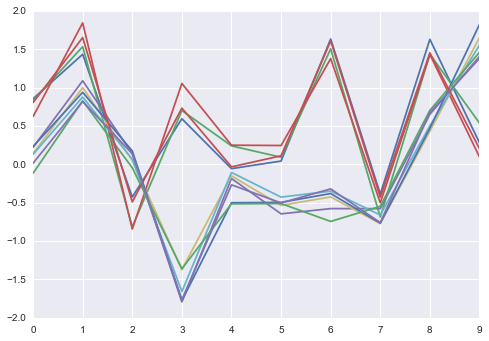

In [17]:
from numpy import asarray
ts = data.collectValuesAsArray()
plt.plot(ts.T);

You can see the list of available generated datasets by calling without an argument

In [18]:
tsc.makeExample()

['factor', 'ica', 'kmeans', 'pca', 'rand', 'sources']

The `loadExample` method directly loads one of the small example datasets. This are highly compressed and downsampled, and meant only to demonstrate basic functionality and help explore the API, not to represent anything meaningful about the data itself.

In [19]:
data = tsc.loadExample('mouse-images')
img = data.values().first()

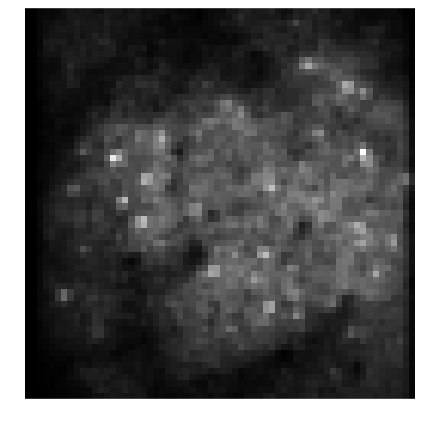

In [20]:
image(img)

In [21]:
data = tsc.loadExample('fish-series')
img = data.seriesMean().pack()

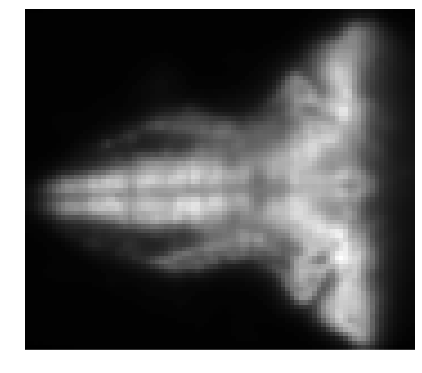

In [22]:
image(img[:,:,0])

You can see the list of avaiable example data sets:

In [23]:
tsc.loadExample()

['fish-images',
 'fish-series',
 'iris',
 'mouse-images',
 'mouse-params',
 'mouse-series']

Example large data sets are available Amazon S3 through the [CodeNeuro](http://datasets.codeneuro.org) data repository. If you are running Thunder on an Amazon EC2 clsuter (see the [instructions](http://thunder-project.org/thunder/docs/install_ec2.html)), these data sets can be can be loaded using the ``loadExampleS3`` method. We show the operation without calling it here, because we assume this notebook is being run locally:

```
data, params = tsc.loadExampleS3('ahrens.lab/direction.selectivity')
```

You can also check the available data sets:

In [24]:
tsc.loadExampleS3()

['ahrens.lab/optomotor.response',
 'ahrens.lab/direction.selectivity',
 'svoboda.lab/tactile.navigation']

Many of these data sets have notebooks associated with them for showing how to load the data